<a href="https://colab.research.google.com/github/peravali810/NLP/blob/main/Quora_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text classification with the bag of words
Outline:

-Download and explore the data
-Apply text preprocessing techniques
-Implement the bag of words model
-Train Ml models for text classification
-Make predictions and submit to kaggle

## Download and explore the data

Outline:
1.Download the dataset from kaggle to collab
2.Explore the data using Pandas
3.Create a small working sample

### Download the data to collab

In [32]:
!ls

data  kaggle.json  sample_data


In [33]:
import os

In [34]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [35]:
!kaggle competitions download -c quora-insincere-questions-classification -f train.csv -p data

train.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


In [36]:
!kaggle competitions download -c quora-insincere-questions-classification -f test.csv -p data
!kaggle competitions download -c quora-insincere-questions-classification -f sample_submission.csv -p data

test.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
sample_submission.csv.zip: Skipping, found more recently modified local copy (use --force to force download)


### Explore the data using pandas

In [37]:
train_fname= "data/train.csv.zip"
test_fname= "data/test.csv.zip"
sample_fname= "data/sample_submission.csv.zip"

In [38]:
import pandas as pd

In [39]:
raw_df = pd.read_csv(train_fname)

In [40]:
raw_df

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0
...,...,...,...
1306117,ffffcc4e2331aaf1e41e,What other technical skills do you need as a c...,0
1306118,ffffd431801e5a2f4861,Does MS in ECE have good job prospects in USA ...,0
1306119,ffffd48fb36b63db010c,Is foam insulation toxic?,0
1306120,ffffec519fa37cf60c78,How can one start a research project based on ...,0


In [41]:
sincere_df= raw_df[raw_df['target']==0]
insincere_df= raw_df[raw_df['target']==1]

In [42]:
sincere_df.question_text.values[:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [43]:
insincere_df.question_text.values[:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

<Axes: xlabel='target'>

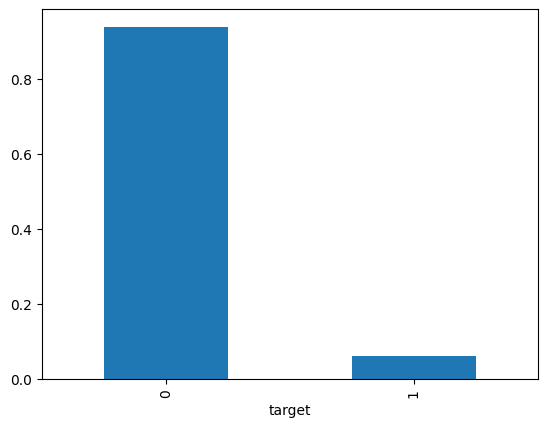

In [44]:
raw_df.target.value_counts(normalize=True).plot(kind='bar')

In [45]:
test_df= pd.read_csv(test_fname)

In [46]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [47]:
sub_df=pd.read_csv(sample_fname)

In [48]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [49]:
sub_df.prediction.value_counts()

,count
prediction,
0,375806


### Create a working sample

In [50]:
sample_size= 100_000

In [51]:
sample_df= raw_df.sample(sample_size, random_state=42)

In [52]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


## Text preprocessing techniques

outline:

1.Understand the bag of words model
2.Tokenization
3.Stop word removal
4.Stemming


### Bag of words intuition

1.Create a list of all the words across all the documents
2.Convert each document into a vector count of each word

### Tokenization

In [53]:
q0= sincere_df.question_text.values[0]
q1= insincere_df.question_text.values[0]

In [54]:
import nltk
from nltk.tokenize import word_tokenize

In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [56]:
q0_tok= word_tokenize(q0)
q1_tok= word_tokenize(q1)

### Stop word removal

In [57]:

from nltk.corpus import stopwords

In [58]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [59]:
en_sw = stopwords.words('english')

In [60]:
def remove_sw(tokens):
  return [w for w in tokens if w.lower() not in en_sw]

In [72]:
q0_sw=remove_sw(q0_tok)

In [73]:
q1_sw=remove_sw(q1_tok)

### Stemming

In [63]:
from nltk.stem.snowball import SnowballStemmer


In [64]:
snow_stemmer = SnowballStemmer(language='english')

In [74]:
q0_stm= [snow_stemmer.stem(w) for w in q0_sw]
q1_stm= [snow_stemmer.stem(w) for w in q1_sw]

In [85]:
q0_stm

['quebec', 'nationalist', 'see', 'provinc', 'nation', '1960s', '?']

In [87]:
q1_stm

['unit', 'state', 'becom', 'largest', 'dictatorship', 'world', '?']

### Lemmatization

In [80]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [83]:
q0_lem= [lemmatizer.lemmatize(w) for w in q0_sw]
q1_lem= [lemmatizer.lemmatize(w) for w in q1_sw]

In [84]:
q0_lem

['Quebec', 'nationalist', 'see', 'province', 'nation', '1960s', '?']

In [88]:
q1_lem

['United', 'States', 'become', 'largest', 'dictatorship', 'world', '?']

## Implementation of Bag of Words

Outline:

1.Creating vocabulary using count vectorizer
2.Transform text to vector usning count vectorizer
3.Configure text preprocessing using CV

### Create a vocabulary

In [89]:
from sklearn.feature_extraction.text import CountVectorizer

In [90]:
vector= CountVectorizer()


In [91]:
small_df = sample_df[:5]

In [94]:
vector.fit(small_df.question_text)

CountVectorizer()

In [97]:
",".join(vector.vocabulary_)

'what,is,the,most,effective,classroom,management,skill,technique,to,create,good,learning,environment,can,study,abroad,after,10th,class,from,bangladesh,how,make,friends,as,college,junior,do,download,free,apk,minecraft,pocket,edition,for,ios,iphone,like,kuvera,groww,also,online,investment,platform,where,invest,in,direct,mutual,funds'

In [99]:
vector.get_feature_names_out()

array(['10th', 'abroad', 'after', 'also', 'apk', 'as', 'bangladesh',
       'can', 'class', 'classroom', 'college', 'create', 'direct', 'do',
       'download', 'edition', 'effective', 'environment', 'for', 'free',
       'friends', 'from', 'funds', 'good', 'groww', 'how', 'in', 'invest',
       'investment', 'ios', 'iphone', 'is', 'junior', 'kuvera',
       'learning', 'like', 'make', 'management', 'minecraft', 'most',
       'mutual', 'online', 'platform', 'pocket', 'skill', 'study',
       'technique', 'the', 'to', 'what', 'where'], dtype=object)

### Transform Documents into vectors

In [100]:
v=vector.transform(small_df.question_text)

In [102]:
v.shape

(5, 51)

### Configure count vectorizer parameters

In [105]:
def tokenize(text):
  return [lemmatizer.lemmatize(word) for word in word_tokenize(text)]

In [106]:
vectorizer= CountVectorizer(lowercase=True, stop_words=en_sw, tokenizer=tokenize, max_features=1000)

In [107]:
%%time
vectorizer.fit(sample_df.question_text)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'] not in stop_words.
  warnings.warn(


CPU times: user 25.7 s, sys: 58.3 ms, total: 25.8 s
Wall time: 26.2 s


CountVectorizer(max_features=1000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function tokenize at 0x7ea622b0fa30>)

In [110]:
vectorizer.get_feature_names_out()[:100]

array(['!', '$', '%', '&', "'", "''", "'m", "'re", "'s", "'ve", '(', ')',
       ',', '-', '.', '1', '10', '100', '11', '12', '12th', '15', '2',
       '20', '2017', '2018', '3', '30', '4', '5', '6', '7', '8', ':', ';',
       '?', '[', ']', '``', 'able', 'abroad', 'accept', 'access',
       'accomplishment', 'according', 'account', 'act', 'action',
       'activity', 'actor', 'actually', 'add', 'address', 'admission',
       'adult', 'advanced', 'advantage', 'advice', 'affect', 'africa',
       'african', 'age', 'ago', 'air', 'allow', 'allowed', 'almost',
       'alone', 'already', 'also', 'always', 'amazon', 'america',
       'american', 'amount', 'analysis', 'ancient', 'android', 'animal',
       'anime', 'another', 'answer', 'anxiety', 'anyone', 'anything',
       'app', 'apple', 'application', 'apply', 'approach', 'apps', 'area',
       'army', 'around', 'art', 'asian', 'ask', 'asked', 'atheist',
       'attack'], dtype=object)

In [111]:
%%time
inputs= vectorizer.transform(sample_df.question_text)

CPU times: user 25.7 s, sys: 60.4 ms, total: 25.8 s
Wall time: 26.3 s


In [112]:
%%time
test_inputs= vectorizer.transform(test_df.question_text)

CPU times: user 1min 41s, sys: 312 ms, total: 1min 41s
Wall time: 1min 48s


## ML models for text classification

Outline:
1.Create a training and vaidation set
2.Train a logistic regression model
3.Make predictions on training, validaiton and test data

### Split into a training and validaiton set

In [113]:
sample_df

,qid,question_text,target
443046,56d324bb1e2c29f43b12,What is the most effective classroom managemen...,0
947549,b9ad893dc78c577f8a63,Can I study abroad after 10th class from Bangl...,0
523769,6689ebaeeb65b209a412,How can I make friends as a college junior?,0
949821,ba1e2c4a0fef09671516,How do I download free APK Minecraft: Pocket E...,0
1030397,c9ea2b69bf0d74626f46,"Like Kuvera, is ""Groww"" also a free online inv...",0
...,...,...,...
998930,c3c03a307a29c69971b4,How do I research list of reliable charcoal im...,0
66641,0d119aba95ee6684f506,"What are petroleum products, and what is petro...",0
90024,11a46cd148a104b271cf,What are some services that will let you quick...,0
130113,1973e6e2111a0c93193a,What credit card processors do online marketpl...,0


In [117]:
from sklearn.model_selection import train_test_split

In [118]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, sample_df.target, test_size=0.3, random_state=42)

### Train a Logistic Regression

In [119]:
from sklearn.linear_model import LogisticRegression

In [123]:
MAX_ITER= 1000

In [124]:
model= LogisticRegression(max_iter=MAX_ITER, solver="sag")

In [125]:
model.fit(train_inputs, train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=1000, solver='sag')

### Make predictions on sample model

In [126]:
train_preds= model.predict(train_inputs)

In [128]:
train_preds

array([0, 0, 0, ..., 0, 0, 0])

In [129]:
pd.Series(train_preds).value_counts()

,count
0,68197
1,1803


In [131]:
pd.Series(train_targets).value_counts()

,count
target,
0,65784
1,4216


In [132]:
from sklearn.metrics import accuracy_score


In [133]:
accuracy_score(train_targets, train_preds)

0.9477

In [134]:
from sklearn.metrics  import f1_score

In [135]:
f1_score(train_targets, train_preds)

0.3917594284764911

In [136]:
val_preds= model.predict(val_inputs)

In [137]:
accuracy_score(val_targets, val_preds)

0.9455666666666667

In [138]:
f1_score(val_targets, val_preds)

0.3760030569354222

In [139]:
sincere_df.question_text.values[0:10]

array(['How did Quebec nationalists see their province as a nation in the 1960s?',
       'Do you have an adopted dog, how would you encourage people to adopt and not shop?',
       'Why does velocity affect time? Does velocity affect space geometry?',
       'How did Otto von Guericke used the Magdeburg hemispheres?',
       'Can I convert montra helicon D to a mountain bike by just changing the tyres?',
       'Is Gaza slowly becoming Auschwitz, Dachau or Treblinka for Palestinians?',
       'Why does Quora automatically ban conservative opinions when reported, but does not do the same for liberal views?',
       'Is it crazy if I wash or wipe my groceries off? Germs are everywhere.',
       'Is there such a thing as dressing moderately, and if so, how is that different than dressing modestly?',
       'Is it just me or have you ever been in this phase wherein you became ignorant to the people you once loved, completely disregarding their feelings/lives so you get to have something g

In [140]:
sincere_df.target.values[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [141]:
model.predict(vectorizer.transform(sincere_df.question_text.values[0:10]))

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [142]:
insincere_df.question_text.values[0:10]

array(['Has the United States become the largest dictatorship in the world?',
       'Which babies are more sweeter to their parents? Dark skin babies or light skin babies?',
       "If blacks support school choice and mandatory sentencing for criminals why don't they vote Republican?",
       'I am gay boy and I love my cousin (boy). He is sexy, but I dont know what to do. He is hot, and I want to see his di**. What should I do?',
       'Which races have the smallest penis?',
       'Why do females find penises ugly?',
       'How do I marry an American woman for a Green Card? How much do they charge?',
       "Why do Europeans say they're the superior race, when in fact it took them over 2,000 years until mid 19th century to surpass China's largest economy?",
       'Did Julius Caesar bring a tyrannosaurus rex on his campaigns to frighten the Celts into submission?',
       "In what manner has Republican backing of 'states rights' been hypocritical and what ways have they actually r

In [143]:
insincere_df.target.values[0:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [144]:
model.predict(vectorizer.transform(insincere_df.question_text.values[0:10]))

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 0])

## Make Predictions to Kaggle

In [145]:
test_df

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?
...,...,...
375801,ffff7fa746bd6d6197a9,How many countries listed in gold import in in...
375802,ffffa1be31c43046ab6b,Is there an alternative to dresses on formal p...
375803,ffffae173b6ca6bfa563,Where I can find best friendship quotes in Tel...
375804,ffffb1f7f1a008620287,What are the causes of refraction of light?


In [147]:
test_preds= model.predict(test_inputs)

In [148]:
sub_df

,qid,prediction
0,0000163e3ea7c7a74cd7,0
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0
...,...,...
375801,ffff7fa746bd6d6197a9,0
375802,ffffa1be31c43046ab6b,0
375803,ffffae173b6ca6bfa563,0
375804,ffffb1f7f1a008620287,0


In [149]:
sub_df.prediction= test_preds

In [150]:
sub_df.prediction.value_counts()

,count
prediction,
0,366235
1,9571


In [151]:
sub_df.to_csv("submission.csv", index=False)